In [90]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt
import tensorflow as tf

# make a plot outputs appear and be stored within the notebook
%matplotlib inline

print("Complete")

Complete


In [91]:
LETTER_NAMES = {
    1: "alif",
    10: "ra",
    11: "zay",
    12: "sin",
    13: "shin",
    14: "sad",
    15: "dad",
    16: "da",
    17: "za",
    18: "ayn",
    19: "gayn",
    2: "ba",
    20: "fa",
    21: "qaf",
    22: "kaf",
    23: "lam",
    24: "mim",
    25: "non",
    26: "ha",
    27: "waw",
    28: "ya",
    29: "hamza",
    3: "ta",
    4: "tha",
    5: "gim",
    6: "ha",
    7: "kha",
    8: "dal",
    9: "thal"
}

In [92]:
x_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")

In [93]:
print(x_train.columns)
print(y_train.columns)
assert len(x_train) == len(y_train)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel1014', 'pixel1015', 'pixel1016', 'pixel1017', 'pixel1018',
       'pixel1019', 'pixel1020', 'pixel1021', 'pixel1022', 'pixel1023'],
      dtype='object', length=1024)
Index(['label'], dtype='object')


In [94]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37933 entries, 0 to 37932
Columns: 1024 entries, pixel0 to pixel1023
dtypes: int64(1024)
memory usage: 296.4 MB


In [95]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37933 entries, 0 to 37932
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   37933 non-null  int64
dtypes: int64(1)
memory usage: 296.5 KB


### Distributions

<AxesSubplot:>

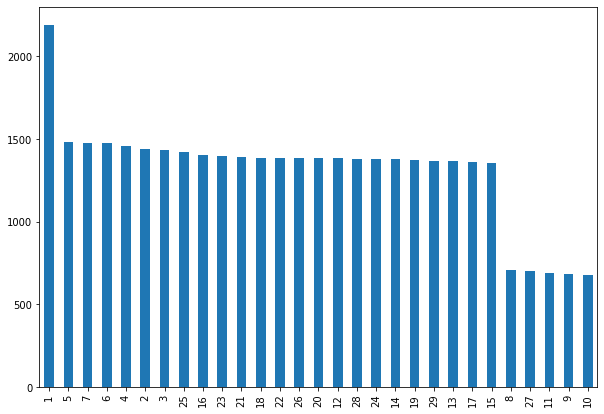

In [96]:
plt.figure(figsize=(10,7))
y_train['label'].value_counts().plot(kind="bar")

In [97]:
max([x_train[column].max() for column in x_train.columns] )

255

So each pixel takes value 0-255

### Checking pc config

In [98]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Changing data format to compatible with tf training

In [99]:
x_train_tf = tf.convert_to_tensor(x_train)
x_train_tf = x_train_tf / 255 # normalisation from 0 - 255 to 0 - 1
x_train_tf

<tf.Tensor: shape=(37933, 1024), dtype=float64, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.01568627,
        0.02352941],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01176471, 0.04313725, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])>

### Test data
For assessing accuracy, loss, etc

In [100]:
x_test = pd.read_csv("./X_test.csv")
y_test = pd.read_csv("./y_test.csv")

In [101]:
x_test_tf = tf.convert_to_tensor(x_test)
x_test_tf = x_test_tf / 255 # normalisation from 0 - 255 to 0 - 1
y_test_tf = y_test - 1
y_test_tf

,label
0,0
1,0
2,0
3,0
4,0
...,...
9496,28
9497,28
9498,28
9499,28


### TF model

In [102]:
y_train_tf = y_train - 1
y_train_tf

,label
0,0
1,0
2,0
3,0
4,0
...,...
37928,28
37929,28
37930,28
37931,28


In [103]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=1024),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(29)
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

#### Accuracy at which model stops learning
##### Relu
256,75,30 50%\
100,50,30 43%

In [117]:
model.fit(x_train_tf, y_train_tf, epochs=100, callbacks=[stop_early])


Epoch 1/100
1186/1186 [==============================] - 8s 6ms/step - loss: 2.6651 - accuracy: 0.2278
Epoch 2/100
1186/1186 [==============================] - 7s 6ms/step - loss: 1.9418 - accuracy: 0.4025
Epoch 3/100
1186/1186 [==============================] - 7s 6ms/step - loss: 1.5994 - accuracy: 0.4975
Epoch 4/100
1186/1186 [==============================] - 7s 6ms/step - loss: 1.3593 - accuracy: 0.5681
Epoch 5/100
1186/1186 [==============================] - 7s 6ms/step - loss: 1.1807 - accuracy: 0.6199
Epoch 6/100
1186/1186 [==============================] - 7s 6ms/step - loss: 1.0410 - accuracy: 0.6633
Epoch 7/100
1186/1186 [==============================] - 8s 6ms/step - loss: 0.9262 - accuracy: 0.6997
Epoch 8/100
1186/1186 [==============================] - 8s 6ms/step - loss: 0.8289 - accuracy: 0.7290
Epoch 9/100
1186/1186 [==============================] - 8s 6ms/step - loss: 0.7451 - accuracy: 0.7557
Epoch 10/100
1186/1186 [==============================] - 8s 7ms/step - l

In [118]:
test_loss, test_acc = model.evaluate(x_test_tf,  y_test_tf, verbose=2)

print('\nTest accuracy:', test_acc)

297/297 - 1s - loss: 6.0990 - accuracy: 0.5124 - 952ms/epoch - 3ms/step

Test accuracy: 0.5123671293258667
